Sea surface temperature / (K)       (time: 225; longitude: 761)
     Dimension coordinates:
          time                           x               -
          longitude                      -               x
     Scalar coordinates:
          expver: 1.0
          latitude: 0.0 degrees
     Attributes:
          CDI: Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.6
          frequency: day
          history: Fri Jan 14 16:52:36 2022: cdo mermean sst_2020_tropical_ocean_eq_ERA5.nc...
<xarray.DataArray 'sst' (time: 225, lon: 761)>
[171225 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T09:00:00 ... 2020-08-31T09:00:00
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 9.25 9.5 9.75 10.0
    expver   float64 ...
    lat      float64 ...
Attributes:
    long_name:    Sea surface temperature
    units:        K
    CDI:  

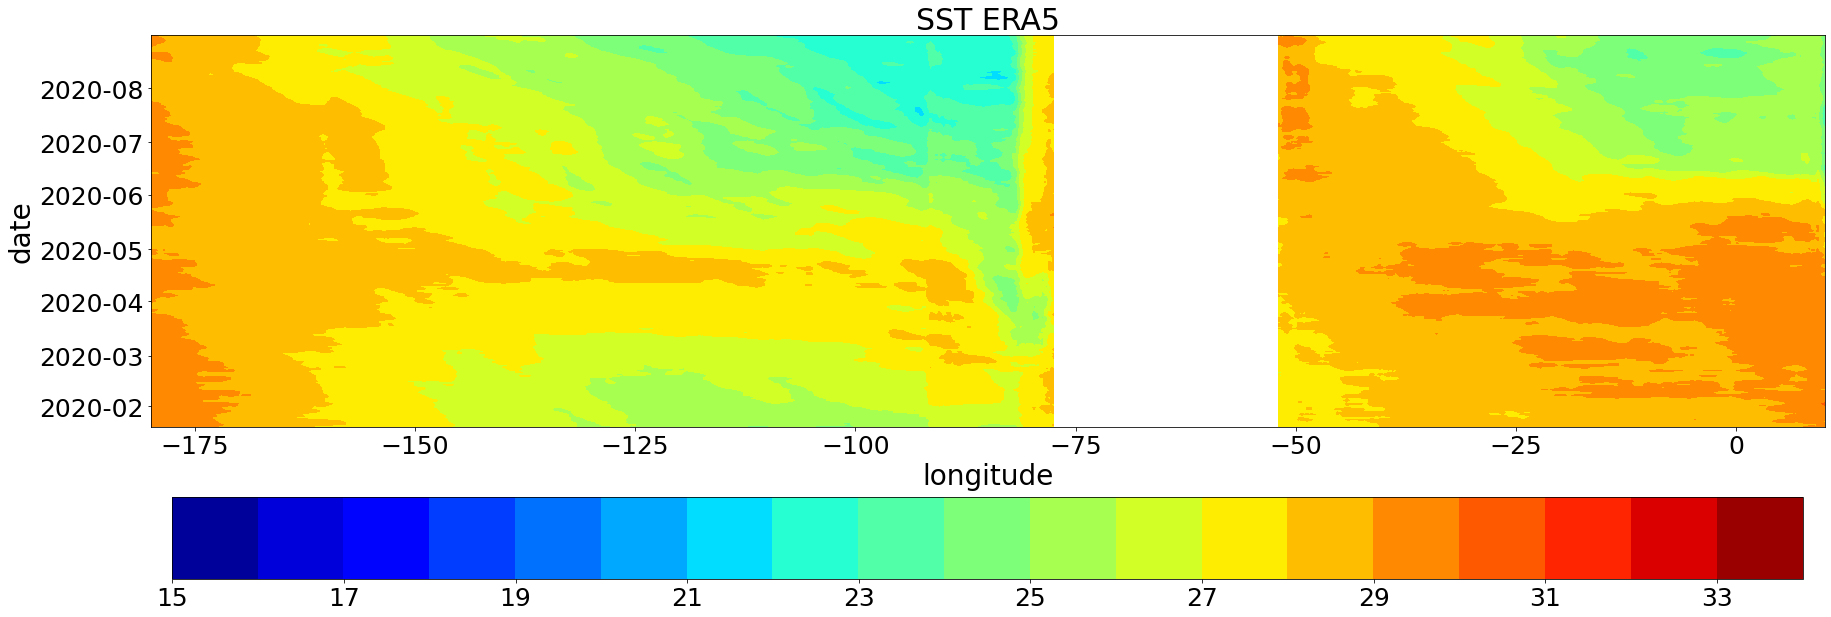

In [7]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############
datain = iris.load_cube('/work/bb1153/b381639/ERA5/sst_2020_tropical_ocean_eqmermean_ERA5.nc')

datain.data=datain.data-273.15

#datain.data=datain.data*-1
regyonx=datain[:,0,0,:]

ERA5=regyonx

print(ERA5)



######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
print(arr)
arr_era=arr
#latm=arr.latitude.data              # latm is x-axis
lonm=arr.lon.data             # lonm is y-axis  
time=arr.time.data 
#np.arange(0,225,1)
##################
#(2)set color bar and prepare fig size
levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
#cbar='seismic'
cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('SST ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('SST_eq_ERA5.eps',format='eps',dpi=1000)

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)


<xarray.DataArray 'ts' (time: 225, lon: 761)>
[171225 values with dtype=float32]
Coordinates:
  * time     (time) float64 2.02e+07 2.02e+07 2.02e+07 ... 2.02e+07 2.02e+07
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 9.25 9.5 9.75 10.0
    lat      float64 ...
Attributes:
    standard_name:             surface_temperature
    long_name:                 surface temperature
    units:                     K
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    history:                   Fri Jan 14 16:52:59 2022: cdo mermean sst_2020...
    source:                    git@gitlab.dkrz.de:icon/icon-aes.git@ca31bdb30...
    institution:               Max Planck Institute for Meteorology
    Conventions:               CF-1.6
    title:                     ICON simulation
    references:                see MPIM/DWD publications
    comment:                   Sapphire Dyamond (k203123) on m20958 (Linux 2....
    cdo_openmp_thread_number:  36
    CDO:   

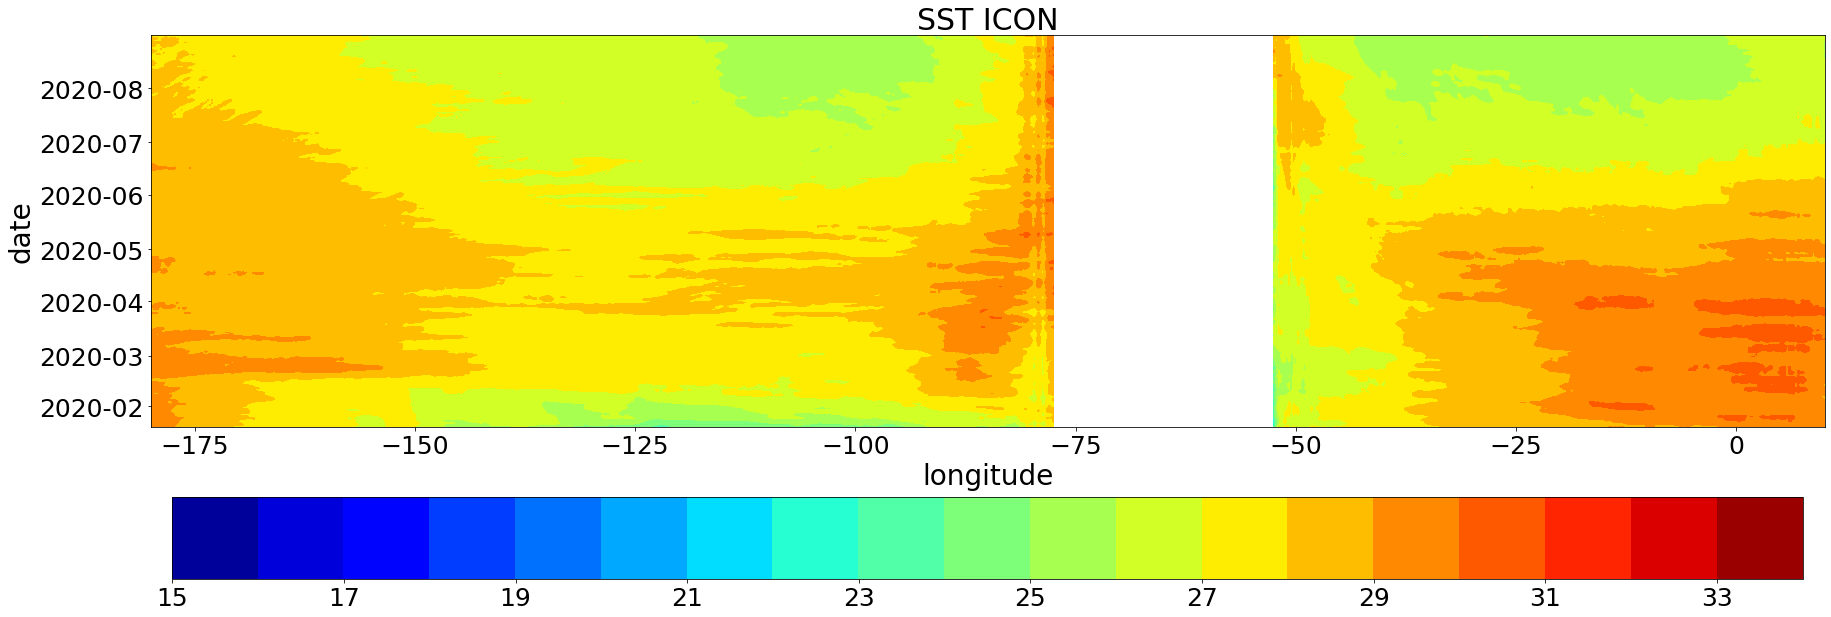

In [6]:
###############
# plot ICON
###############
datain = iris.load_cube('/work/bb1153/b381639/model/data_icon/sst_2020_tropical_ocean_eqmermean_ICON.nc')

datain.data=datain.data-273.15

#datain.data=datain.data*-1
regyonx=datain[:,0,:]

ICON=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ICON) # iris cube to xarray
arr_icon=arr
print(arr)
#latm=arr.latitude.data              # latm is x-axis
lonm=arr.lon.data             # lonm is y-axis  
#time=np.arange(0,225,1)
##################
#(2)set color bar and prepare fig size
levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
#cbar='seismic'
cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('SST ICON',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('SST_eq_ICON.eps',format='eps',dpi=1000)

In [3]:
SSTdiff=ICON.data-ERA5.data

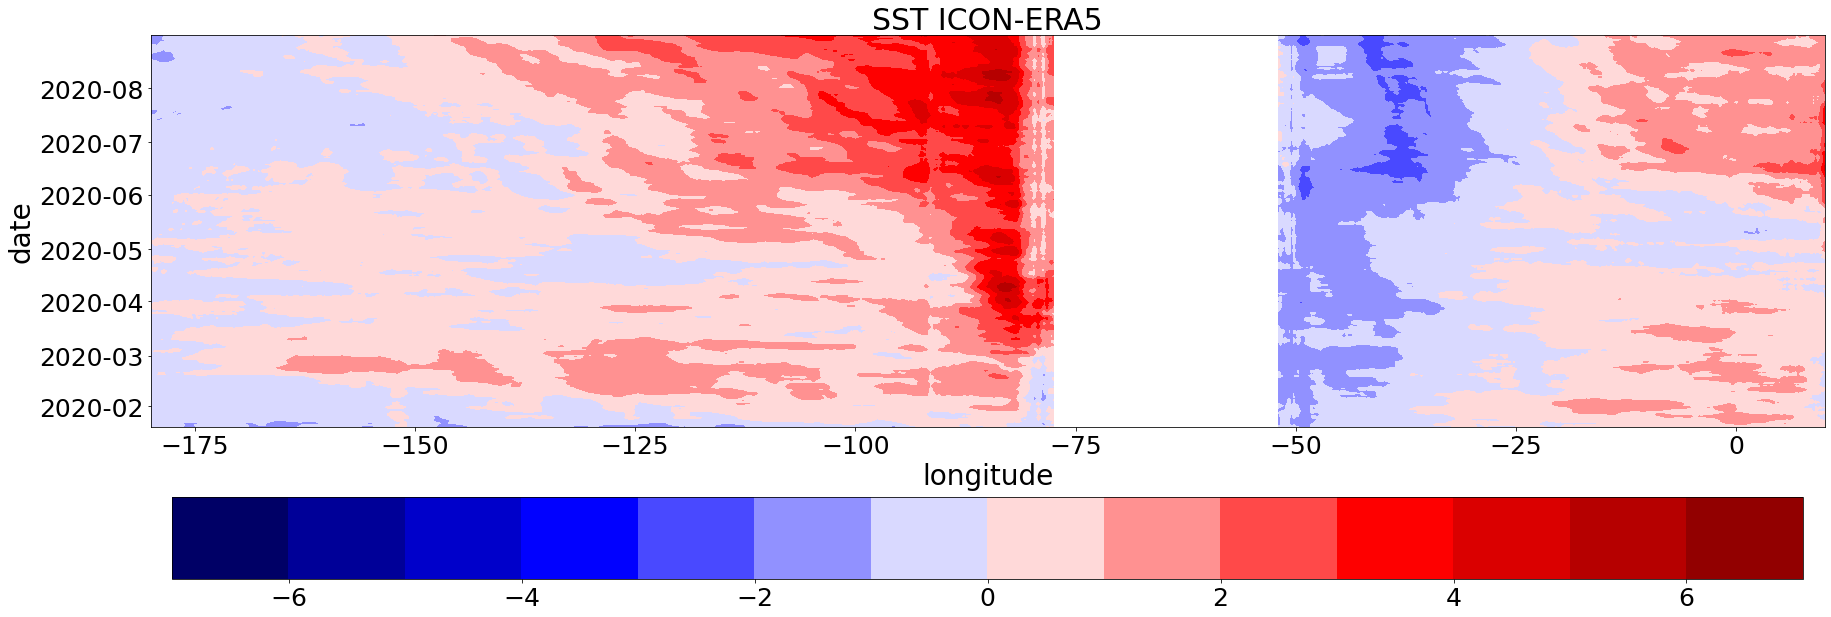

In [5]:
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=SSTdiff #ar.DataArray.from_iris(SSTdiff) # iris cube to xarray
#latm=arr.latitude.data              # latm is x-axis
#lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
levels1=np.arange(-7,8,1) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('SST ICON-ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('SST_ICON-ERA5_eq.eps',format='eps',dpi=1000)